In [1]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from matplotlib import pyplot
import pandas as pd

In [2]:
def get_dataset(file, n_features):
    df = pd.read_csv(file, sep=',', index_col=0)
    X = df.iloc[:, :n_features]
    y = df.iloc[:, n_features]
    return X, y

In [3]:
def get_models(svm_c, n_features):
    models = dict()
    for i in range(2, n_features):
        rfe = RFE(estimator=SVC(kernel='linear', C=svm_c), n_features_to_select=i)
        model = SVC(kernel='linear', C=svm_c)
        models[str(i)] = Pipeline(steps=[('s',rfe), ('m',model)])
    return models

In [4]:
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores

In [5]:
def run_rfe(models, X, y):    
    results, names = list(), list()
    for name, model in models.items():
        scores = evaluate_model(model, X, y)
        results.append(scores)
        names.append(name)
        print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
    return results, names

In [6]:
def selected_features(svm_c, n, X, y):
    rfe = RFE(estimator=SVC(kernel='linear', C=svm_c), n_features_to_select=n)
    rfe.fit(X,y)
    cols = []
    for i in range(X.shape[1]):
        # print('Column: %d, Selected %s, Rank: % .3f' % (i, rfe.support_[i], rfe.ranking_[i]))
        if rfe.support_[i]:
            cols.append(X.columns[i])
    return cols

In [7]:
file = '~/RFE_46.csv'
X,y = get_dataset(file, 46)

In [8]:
models = get_models(8,46)

In [9]:
results, names = run_rfe(models, X, y)

>2 0.700 (0.187)
>3 0.700 (0.187)
>4 0.617 (0.180)
>5 0.667 (0.175)
>6 0.683 (0.170)
>7 0.733 (0.143)
>8 0.733 (0.143)
>9 0.717 (0.155)
>10 0.733 (0.170)
>11 0.733 (0.170)
>12 0.733 (0.170)
>13 0.733 (0.170)
>14 0.750 (0.158)
>15 0.767 (0.170)
>16 0.767 (0.143)
>17 0.783 (0.155)
>18 0.800 (0.163)
>19 0.817 (0.170)
>20 0.800 (0.187)
>21 0.800 (0.187)
>22 0.833 (0.149)
>23 0.833 (0.149)
>24 0.833 (0.149)
>25 0.833 (0.149)
>26 0.833 (0.149)
>27 0.833 (0.149)
>28 0.833 (0.149)
>29 0.833 (0.149)
>30 0.833 (0.149)
>31 0.850 (0.122)
>32 0.850 (0.122)
>33 0.850 (0.122)
>34 0.850 (0.122)
>35 0.833 (0.149)
>36 0.850 (0.122)
>37 0.850 (0.122)
>38 0.850 (0.122)
>39 0.850 (0.122)
>40 0.850 (0.122)
>41 0.850 (0.122)
>42 0.850 (0.122)
>43 0.850 (0.122)
>44 0.850 (0.122)
>45 0.850 (0.122)


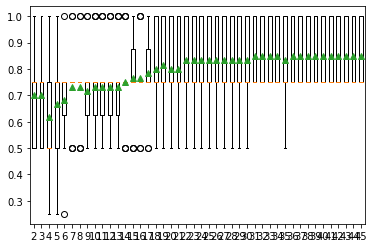

In [10]:
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [11]:
selected_features(8, 31, X, y)

['CTD-2026A21.1',
 'MSMB',
 'FBP2',
 'LINC00992',
 'NLRP4',
 'Lnc-KY-2',
 'Lnc-GJA10-4',
 'PRSS8',
 'CPA6',
 'IGHVII-60-1',
 'CAMP',
 'SDR16C5',
 'Lnc-SAMSN1-2',
 'LINC01747',
 'CCDC85A',
 'Lnc-MEF2C-4',
 'KCNQ1OT1',
 'VWCE',
 'ABCA9',
 'Lnc-PABPN1L-1',
 'CFAP91',
 'SPTBN2',
 'KCNJ2',
 'WNT9A',
 'CASP5',
 'LINC01415',
 'Lnc-IRF2BP2-1',
 'PTBP1P',
 'TMEM132B',
 'ACOD1',
 'MYOCD']